# EXERCÍCIOS

Gerar um mapa com a classificação dos municípios do Estado de Tocantins em relação ao número de focos ocorridos no mês de setembro de 2016.

In [1]:
# encoding: utf-8
%matplotlib inline
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
focos = gpd.read_file("/home/labgeo6/Willian/PythonGilberto/Focos2016/Focos.2016-01-01.2016-12-31.shp")
#focos.dtypes

In [3]:
focos["timestamp"] = pd.to_datetime(focos["DataHora"])

In [4]:
focos_to = focos[focos.Estado == 'Tocantins']
focos_to_set = focos_to[focos.timestamp.dt.month == 9]

/home/labgeo6/anaconda2/envs/geospatial/lib/python2.7/site-packages/geopandas/geodataframe.py:398: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super(GeoDataFrame, self).__getitem__(key)


In [5]:
focos_to_set.head(2)

,DataHora,Satelite,Pais,Estado,Municipi,Bioma,DiaSemCh,Precipit,RiscoFog,Latitude,Longitud,AreaIndu,FRP,geometry,timestamp
84977,2016/09/01 16:04:38,AQUA_M-T,Brasil,Tocantins,Goiatins,Cerrado,40,0.3,1.0,-8.048,-47.666,,0.0,POINT (-47.666 -8.048),2016-09-01 16:04:38
84996,2016/09/01 16:04:38,AQUA_M-T,Brasil,Tocantins,Goiatins,Cerrado,40,0.3,1.0,-8.047,-47.670,,0.0,POINT (-47.67 -8.047000000000001),2016-09-01 16:04:38


# Importando o Shapefile de municípios do IBGE

In [6]:
#Base de municípios do IBGE
municipios = gpd.read_file("/home/labgeo6/Willian/PythonGilberto/Municipios_BR/BRMUE250GC_SIR.shp")

In [7]:
#Tocantins: 17
#Minas Gerais: 31
#Rio Grande do Sul:43

#Separando apenas os municípios do estado do Tocantins
munic_to = municipios[municipios["CD_GEOCMU"].str[0:2] == "17"]

In [8]:
#Como os Sistema de Referência são diferentes....
focos_to_set.crs = {'init': 'epsg:4326'}
munic_to.crs = {'init': 'epsg:4326'}

In [9]:
# Agrupando os dados
To_join = gpd.sjoin(focos_to_set, munic_to, how="right", op='intersects')

In [10]:
To_join.head(2)

,index_left,DataHora,Satelite,Pais,Estado,Municipi,Bioma,DiaSemCh,Precipit,RiscoFog,Latitude,Longitud,AreaIndu,FRP,timestamp,NM_MUNICIP,CD_GEOCMU,geometry
index_right,,,,,,,,,,,,,,,,,,
366,84977.0,2016/09/01 16:04:38,AQUA_M-T,Brasil,Tocantins,Goiatins,Cerrado,40.0,0.3,1.0,-8.048,-47.666,,0.0,2016-09-01 16:04:38,GOIATINS,1709005,POLYGON ((-47.43492963199998 -7.55911717699996...
366,84996.0,2016/09/01 16:04:38,AQUA_M-T,Brasil,Tocantins,Goiatins,Cerrado,40.0,0.3,1.0,-8.047,-47.670,,0.0,2016-09-01 16:04:38,GOIATINS,1709005,POLYGON ((-47.43492963199998 -7.55911717699996...


In [11]:
munic_to_2 = munic_to.set_index('NM_MUNICIP')

In [12]:
#focos_selected = To_join.groupby("Municipi").Municipi.count()
focos_selected = To_join.groupby("NM_MUNICIP").Municipi.count()

focos_selected.index.name = "Municipios"
focos_selected.name = "Numero de focos por municipio em Tocantins, para Setembro de 2016"
focos_selected.head()

Municipios
ABREULÂNDIA             50
AGUIARNÓPOLIS            0
ALIANÇA DO TOCANTINS    19
ALMAS                   42
ALVORADA                 1
Name: Numero de focos por municipio em Tocantins, para Setembro de 2016, dtype: int64

In [13]:
focos_to_mu = pd.concat([munic_to_2, focos_selected], axis=1)
focos_to_mu.head()

,CD_GEOCMU,geometry,"Numero de focos por municipio em Tocantins, para Setembro de 2016"
ABREULÂNDIA,1700251,POLYGON ((-49.39149645199996 -9.17452846299994...,50
AGUIARNÓPOLIS,1700301,POLYGON ((-47.57648308799997 -6.41472972499997...,0
ALIANÇA DO TOCANTINS,1700350,POLYGON ((-48.71252417899996 -11.1699301449999...,19
ALMAS,1700400,POLYGON ((-47.26256828099997 -10.9813311369999...,42
ALVORADA,1700707,POLYGON ((-49.03874863299995 -12.2244394629999...,1


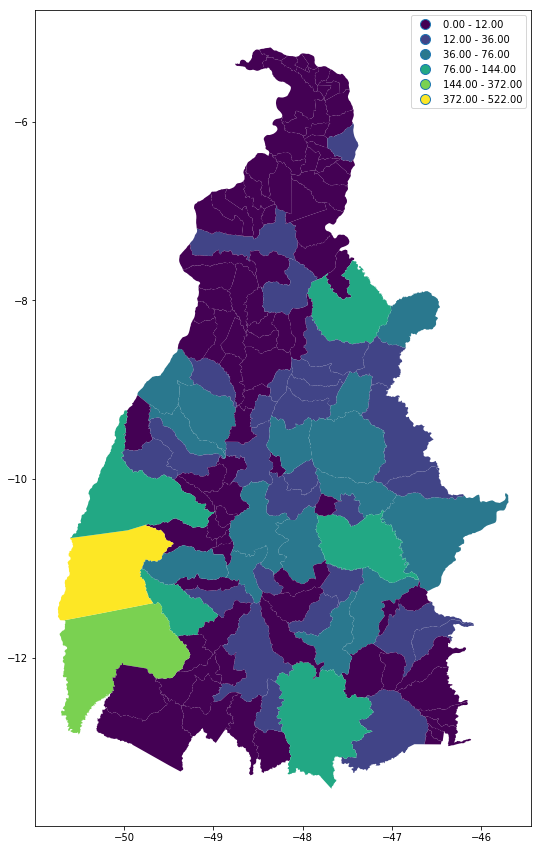

In [16]:
mapaFocos = focos_to_mu.plot(column='Numero de focos por municipio em Tocantins, para Setembro de 2016', \
                              figsize = (20, 15), k=6, legend = True, scheme = 'Fisher_jenks')

mapaFocos.plot();